# Twit NLP

#### Setup

In [2]:
#Get nbn tweets
##Added crt path onto /Users/mitchsa/Library/Python/3.7/lib/python/site-packages/tweepy/binder.py line 39
# import sys
# sys.path.append("../API")
from creds import TWITKEY, TWITSECKEY, TWITACC, TWITTOK
import os
import tweepy as tw
import pandas as pd

In [3]:
auth = tw.OAuthHandler(TWITKEY, TWITSECKEY)
auth.set_access_token(TWITACC, TWITTOK)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
search_words = "westpac -filter:retweets" 

# since:2019-01-01 until:2019-02-01" #max 7 days
##GOOD EXAMPLE OF THINGS TO FILTER - https://twitter.com/nbn_tweets (North by Northwestern)
# date_since = "2019-01-01"
# search_words = "Labor’s full fibre NBN was going to cost -filter:retweets"

In [4]:
#looping on max_id to get volume http://t-redactyl.io/blog/2017/04/applying-sentiment-analysis-with-vader-and-the-twitter-api.html

# import time

# data = api.search(q = search_words, count = 100, lang = 'en', result_type = 'mixed', tweet_mode="extended")
# data_all = data.values()[1]

# while (len(data_all) <= 20000):
#     time.sleep(5)
#     last = data_all[-1]['id']
#     data = api.search(q = search_words, count = 100, lang = 'en', result_type = 'mixed', tweet_mode="extended", max_id = last)
#     data_all += data.values()[1][1:]

In [5]:
# for key in list(tweets)[0]._json:
#     print(key)

In [5]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
#               since=date_since, 
#               before="2019-01-03",
            tweet_mode="extended").items(10000)
# tweets

In [7]:
# print(str(list(tweets)[3]).replace('{', '_____\n').replace(',', '\n  '))

In [6]:
# # https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

info = [[tweet.user.name, tweet.user.location,
         tweet.user.profile_background_image_url_https,
         tweet.user.followers_count,
         
         tweet.created_at, 

         tweet.full_text, 
        
         tweet._json.get('retweet_count',0), 
         tweet.favorite_count,#_json.get('favourite_count', 0),

         [hsh.get('url') for hsh in tweet.entities.get('urls', {})],
         [hsh.get('text') for hsh in tweet.entities.get('hashtags', {})]
         ] for tweet in tweets]
# # info[5]

# #          tweet.entities.get('urls'),
# #          tweet._json.get('coordinates', {}).get('coordinates'), 
# #          [hsh.get('text') for hsh in tweet._json.get('entities', {}).get('hashtags', {})]
# #

In [7]:
len(info)

464

In [8]:
tt = pd.DataFrame(data=info, 
                    columns=['name', 'location', 'picurl', 'followers',
                            'dt', 'text', 'rts', 'favs', 'urls', 'hashtags'])
# # tt[:2]

In [12]:
# tt[tt['urls'].map(len)>1]
# tt

In [9]:
import re
tt['cleantext'] = [re.sub('|'.join(row.urls), '', row.text) for i, row in tt.iterrows()]

In [10]:
# for url in tt[tt['urls'].map(len)==0].urls:
#     print(url[])

In [11]:
real_u = []
import warnings
warnings.simplefilter("ignore")
import requests

for i, url in enumerate(tt.urls):
    if i%1000==0:
        print(i)
#     print(url)
    try:
        if len(url)>0:
            r = requests.get(url[-1], verify = False).url
            real_u.append(r)
        else:
            real_u.append('nourl')
    except:
        real_u.append('nourl')

0


In [12]:
tt['propurl'] = real_u

In [13]:
len(tt)

464

In [14]:
len(real_u)

464

In [22]:
tt.iloc[5]

name                                              Anton Murray
location                                     Sydney, Australia
picurl       https://abs.twimg.com/images/themes/theme14/bg...
followers                                                  254
dt                                         2021-05-18 03:04:38
text         Ex-Westpac boss lands at investment consultant...
rts                                                          0
favs                                                         0
urls                                 [https://t.co/STVINy0K0o]
hashtags                                                    []
cleantext    Ex-Westpac boss lands at investment consultant...
propurl                                                  nourl
Name: 5, dtype: object

In [1]:
import twitter_extract as te

In [2]:
tw = te.twit_api()

In [3]:
tw.scrape('westpac')

Number of tweets scraped: 464


In [6]:
tw.extract[:5]

,name,location,picurl,followers,dt,text,rts,favs,urls,hashtags,cleantext,propurl
0,Lavenia Rokovucago,Fiji,None,312,2021-05-18 03:37:09,Mission accomplished! Apparently you have to b...,0,0,[https://t.co/w72LUIZYGx],[Fiji],Mission accomplished! Apparently you have to b...,[https://t.co/w72LUIZYGx]
1,Westpac Bank,Australia,https://abs.twimg.com/images/themes/theme7/bg.gif,59108,2021-05-18 03:17:24,@lynnecazaly Thanks Lynne. I look forward to h...,0,0,[],[],@lynnecazaly Thanks Lynne. I look forward to h...,[]
2,Lynne Cazaly,AUS,https://abs.twimg.com/images/themes/theme16/bg...,8746,2021-05-18 03:14:57,@Westpac Thanks Fred that’s very supportive. I...,0,0,[],[],@Westpac Thanks Fred that’s very supportive. I...,[]
3,Lynne Cazaly,AUS,https://abs.twimg.com/images/themes/theme16/bg...,8746,2021-05-18 03:11:16,@jwgrenning @BankofMelb @Westpac Oh duh... for...,0,0,[],[],@jwgrenning @BankofMelb @Westpac Oh duh... for...,[]
4,James W Grenning,"Bonita Springs, FL",https://abs.twimg.com/images/themes/theme1/bg.png,5824,2021-05-18 03:07:32,@lynnecazaly @BankofMelb @Westpac You're Austr...,0,1,[],[],@lynnecazaly @BankofMelb @Westpac You're Austr...,[]


In [19]:
df = tt.copy()

In [20]:
df.to_csv('twitnbn7.csv')

<hr>

In [144]:
import pandas as pd
df = pd.read_csv('twitnbn2.csv')

In [145]:
##CAN USE TWEETS ABOUT OR OR OR Grab urls, and scrape text off articles?

In [146]:
import spacy
nlp = spacy.load('en_core_web_lg')

# look into...

#word2vec, #gensim
# https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/5722190290795989/2546946806099472/8175309257345795/latest.html
# https://spark.apache.org/docs/latest/api/python/pyspark.ml.html?highlight=word2vec
# speed up spacy parallel, lstm in python
# https://towardsdatascience.com/lstm-for-time-series-prediction-de8aeb26f2ca

# https://medium.com/@ageitgey/natural-language-processing-is-fun-9a0bff37854e
# https://spacy.io/usage/training#section-ner #updating named entity recog

In [172]:
ls = []
for txt in df.cleantext:
    snt = nlp(txt)
    
    once = []
    for entity in snt.ents:
        if (entity.label == 383):
            once.append(entity.text)
    if once == []:
        ls.append("")
    else:
        ls.append(" ".join(once))
#     print(snt, "\n", once, "\n---")
    

In [173]:
ls[:3]

['LNP', 'ADSble \n vi @ZDNe &m @dbe', '']

In [174]:
df['NER']=ls

In [152]:
# pd.set_option('max_colwidth', 300)
# df.cleantext[:5]

In [177]:
len(df.NER.unique())

1886

In [189]:
nrs = pd.DataFrame(df.NER.value_counts()).reset_index().query('index!="" & NER>5')
# nrs


In [157]:
# df[['cleantext','urls', 'NER']][:20]

In [197]:
red = df[df.NER.isin(nrs['index'])]

In [195]:
import plotly.express as px

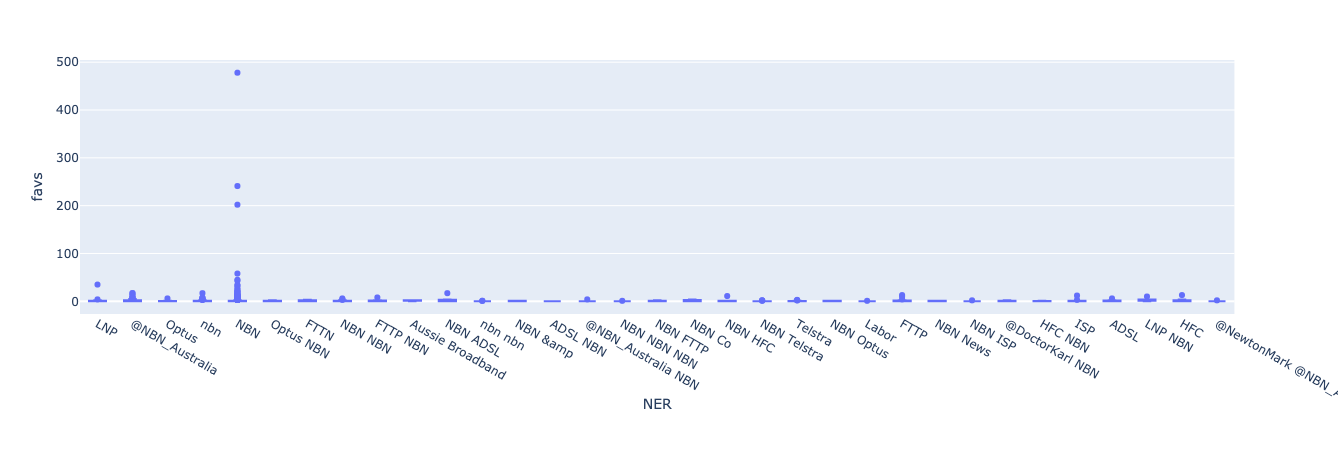

In [200]:
px.box(red, 'NER', 'favs', hover_data = ['cleantext'])

In [49]:
sent = nlp(df.cleantext[2])

In [69]:
sent = nlp(df.cleantext[6])
print(sent, '\n')
for entity in sent.ents:
    print(f"{entity.text} ({entity.label_})")

@KleinRevd @lynlinking @canberratimes $50bn for submarines... that will last only a few minutes when they're actually needed.

At least the NBN will last longer :( 

@KleinRevd @lynlinking @canberratimes (ORG)
50bn (MONEY)
only a few minutes (TIME)
NBN (ORG)


In [24]:
for pos in sent:
    print(pos, pos.pos_)

it PRON
’s VERB
been AUX
nearly ADV
a DET
month NOUN
since SCONJ
i PRON
signed VERB
up ADP
for ADP
@NBN_Australia PROPN
through ADP
@BelongAU PRON
and CCONJ
I PRON
’m VERB
still ADV
not PART
connected ADJ
. PUNCT
Technicians NOUN
have AUX
n’t PART
showed VERB
up ADP
to ADP
scheduled VERB
appointment NOUN
and CCONJ
today NOUN
when ADV
he PRON
showed VERB
up ADP
he PRON
realised VERB
the DET
service NOUN
lines NOUN
did AUX
n’t PART
reach VERB
the DET
apartment NOUN
. PUNCT


In [25]:
import textacy
doc = sent #nlp(text)

##MAYBE TRY WITH nlp'd articles!

# Extract semi-structured statements
statements = textacy.extract.semistructured_statements(doc, "NBN")

# Print the results
print("Here are the things I know about NBN:")

for statement in statements:
#     subject, verb, fact = statement
#     print(f" - {fact}")
    print(statement)

Here are the things I know about NBN:


### Tokenisation, Lemmatisation, Stemming
1. Tokenisation: Breaking down text into words - e.g. splitting on space

2. Stemming: Taking the root part of a given word, or the 'stem' - e.g. dancing, dancer, danced = danc. It is more rudimentary compared to lemmatisation as it is based on simple yet extensive regex rules.

3. Lemmatisation: Similar to stemming, yet tries to find the root *meaning* of a given word. It will return a full english word - for gone, going and went, the 'lemma' will be 'go'.

### N-Grams
This process will tokenize a sentence into combinations of *n* words together.

In [ ]:
# POS (patterns of speech)
# named entity recognition
# chunking (we caught the pink panther - we/caught/the pink panther)

### Transformation

#### TFIDF (Term Frequency vs Inverse Document Frequency)
